In [2]:
import pandas as pd
import numpy as np

In [17]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing_dataset = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing_dataset.data.features 
y = bike_sharing_dataset.data.targets 

In [19]:
# Process the date and hour column and convert it to a time stamp
Xm, ym = X, y
Xm.loc[:,'dteday'] = pd.to_datetime(X.loc[:,'dteday'])
Xm.loc[:,'datetime'] = Xm.loc[:,'dteday'] + pd.to_timedelta(Xm.loc[:,'hr'], unit = 'h')
Xm = Xm.drop(['dteday'], axis = 1)
Xm.set_index('datetime', inplace = True)
ym.set_index(X['datetime'], inplace = True)

# Merged data
data = pd.merge(Xm,ym, left_index=True, right_index=True)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


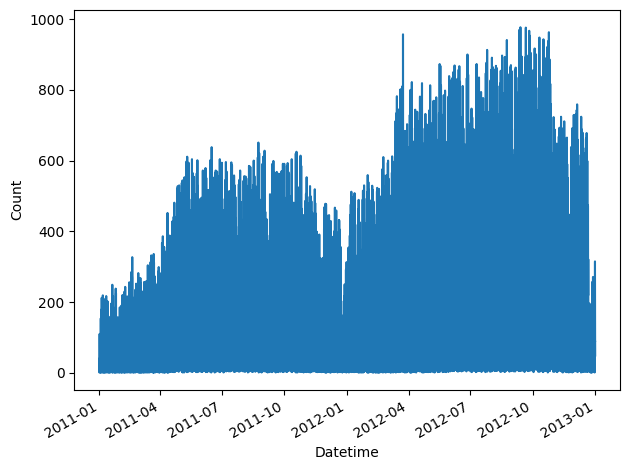

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(data.index, data["cnt"])
ax.set_xlabel("Datetime")
ax.set_ylabel("Count")

fig.autofmt_xdate()
plt.tight_layout()


Checking if the series is stationary.

In [22]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(data["cnt"])  
 
print(f'ADF Statistic: {ADF_result[0]}') 
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -6.82291871189509
p-value: 1.9808626277978587e-09


With a p-value less than 0.05, we can reject the null hypothesis that our data is not stationary.

Check if the series is a random walk

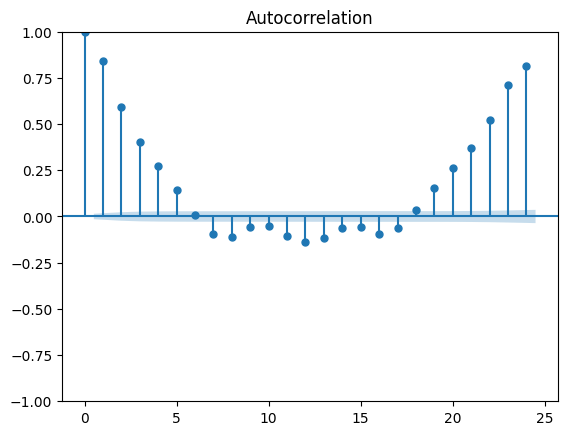

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

# checking autocorrelation for t
fig = plot_acf(data["cnt"].values, lags=24)
plt.show()

Clearly not a random walk and has a strong autocorrelation